# Import

In [17]:
library(ggplot2)
library(dplyr)

In [14]:
df <- read.csv("./df_fig.csv")

In [15]:
head(df)

,X,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,0,fivenodes,STGCN,0.0,,2,12,,50,0.7293743,80.98522,GConvGRU
2,1,fivenodes,STGCN,0.0,,2,12,,50,0.7290817,80.89179,GConvGRU
3,2,fivenodes,STGCN,0.7,rand,2,12,linear,50,1.8922616,81.97655,GConvGRU
4,3,fivenodes,STGCN,0.7,rand,2,12,nearest,50,2.2112885,87.80387,GConvGRU
5,4,fivenodes,STGCN,0.8,rand,2,12,linear,50,2.0728178,103.64874,GConvGRU
6,5,fivenodes,STGCN,0.8,rand,2,12,nearest,50,2.5664744,98.34010,GConvGRU


# fivenode

In [168]:
fivenodes <- data.frame(rbind(
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='GConvLSTM' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==2 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==2 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & lags==2 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & lags==2 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==2 & epoch==50 & model=='TGCN' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8)),
    df %>% filter(dataset=='fivenodes' & mtype=='rand' & inter_method == 'linear' & nof_filters==2 & lags==2 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate == 0.7  | mrate ==  0.8))))

## 후보 1

Saving 6.67 x 6.67 in image


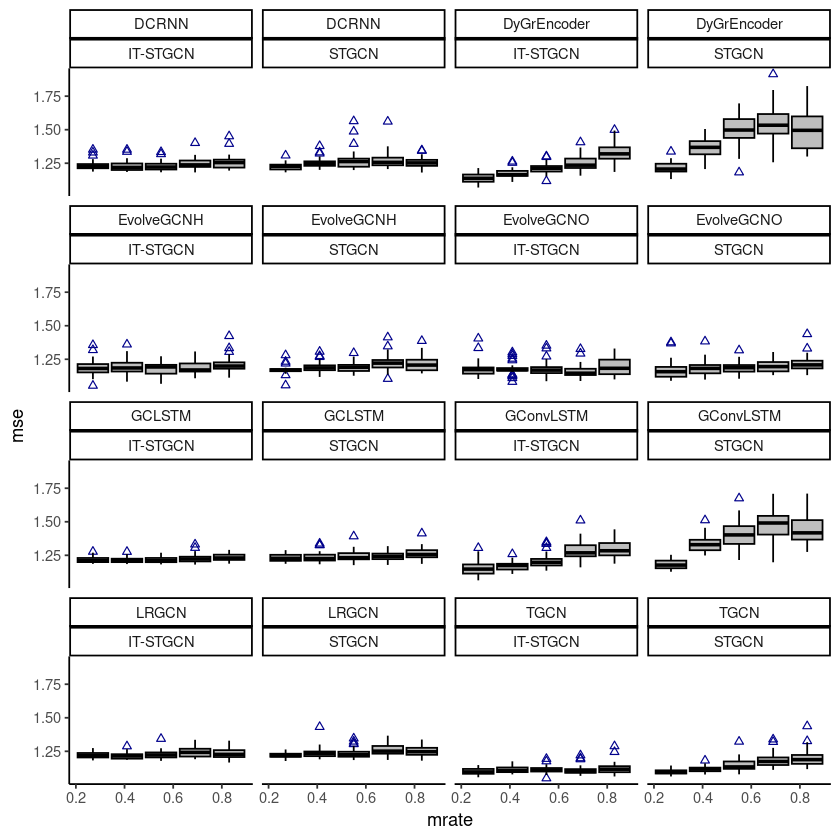

In [174]:
ggplot(fivenodes, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()
# ggsave("random_list_fivenodes.png")

# ChickenpoxDatasetLoader(lags=4)

In [160]:
chickenpox <- rbind(
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GConvGRU'  & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==32 & lags==4 & epoch==50 & model=='GConvLSTM' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GCLSTM'  & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' &  
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNH' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNO' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>%filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN'  &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>%filter(dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='DCRNN'  &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)))

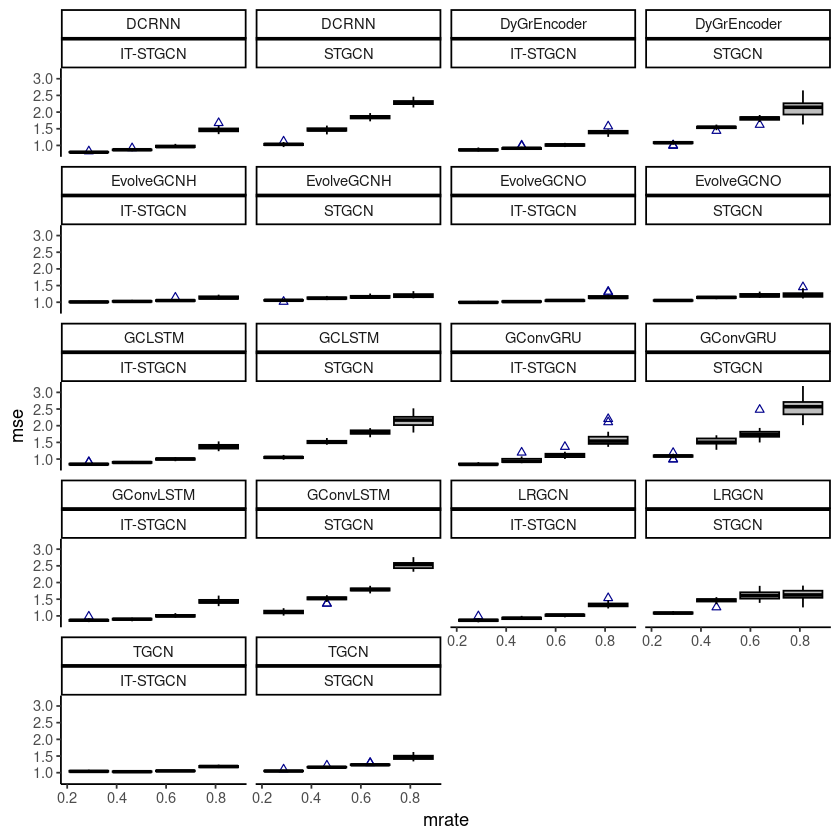

In [154]:
ggplot(chickenpox, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

# PedalMeDatasetLoader (lags=4)

In [158]:
pedalme <- rbind(
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & 
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==2 & lags==4 & epoch==50 & model=='GConvLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==4 & epoch==50 & model=='GCLSTM' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNH' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNO' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)),
    df %>% filter(dataset=='pedalme' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='DCRNN' &
                  ( mrate == 0.3  | mrate == 0.5  |mrate ==  0.6 | mrate ==  0.8)))

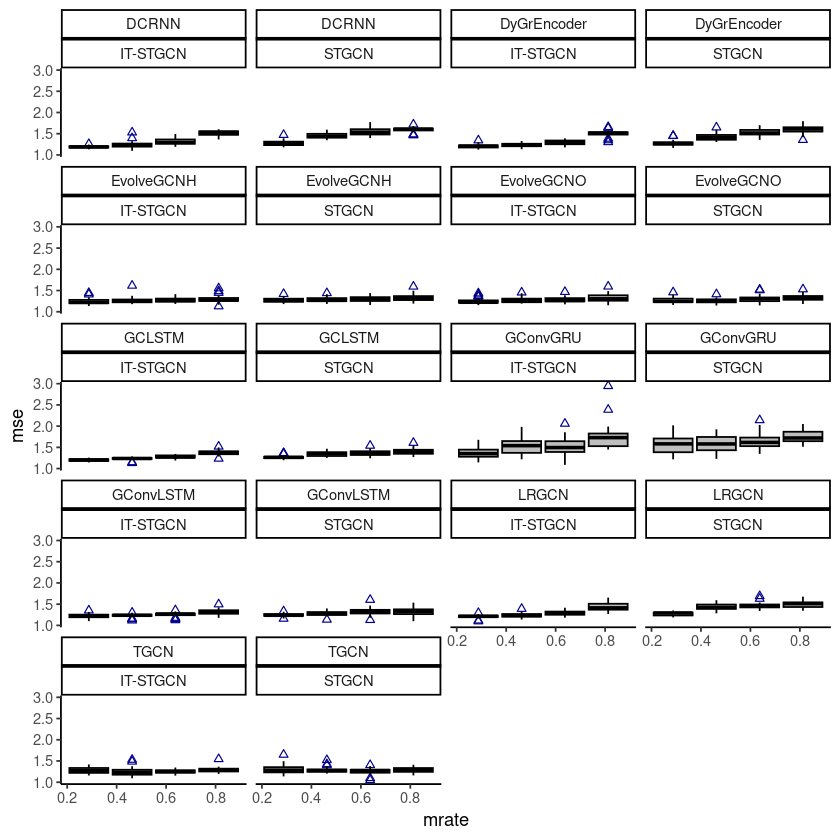

In [159]:
ggplot(pedalme, aes(x=mrate,y= mse,group=mrate)) + facet_wrap(model~method,ncol=4) + 
geom_boxplot(fill='grey',color='black',width=0.7,outlier.color = 'darkblue',outlier.shape = 2) + theme_classic()

# WikiMathsDatasetLoader (lags=8)

# Windmillsmall(lags=8)

# Montevideobus (lags=4)